# Analyses multi-variées

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/creditcard_clean.csv')

### Analyse bivariée de la variables cible 'Class'


RÉPARTITION DES CLASSES:
Classe 0 (Normal):    283,253 transactions (99.8333%)
Classe 1 (Fraude):    473 transactions (0.1667%)
Ratio fraude/normal:  1:599
Taux de déséquilibre: 598.84:1




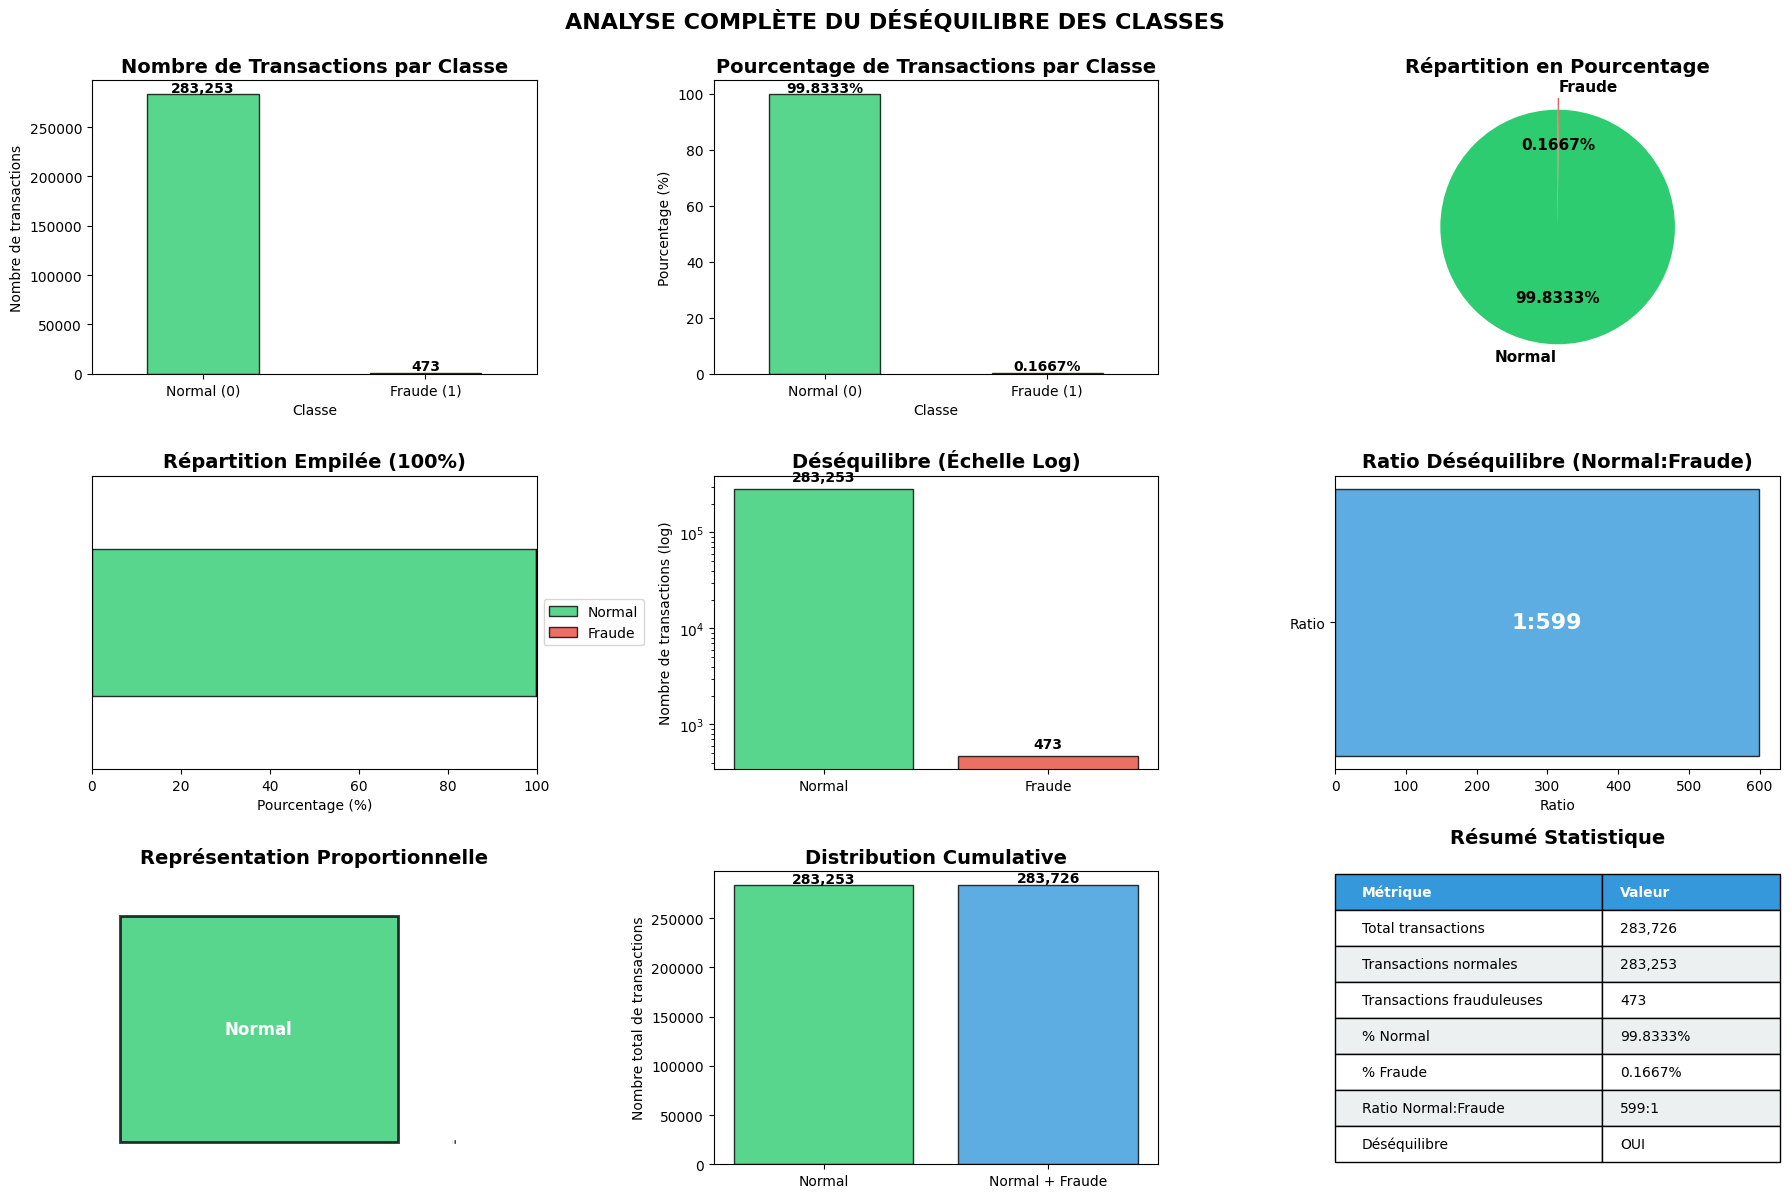

IMPACT DU DÉSÉQUILIBRE

Degré de déséquilibre: ÉLEVÉ (100:1 à 1000:1)

IMPLICATIONS:
• Nécessite des techniques de rééchantillonnage (SMOTE, undersampling)
• Les métriques classiques (accuracy) sont trompeuses
• Privilégier: Precision, Recall, F1-Score, AUC-ROC, AUC-PR
• Considérer des poids de classe (class_weight) dans les modèles
• Stratification obligatoire lors du train/test split




In [ ]:
# Répartition des classes
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print("\nRÉPARTITION DES CLASSES:")
print(f"Classe 0 (Normal):    {class_counts[0]:,} transactions ({class_percentages[0]:.4f}%)")
print(f"Classe 1 (Fraude):    {class_counts[1]:,} transactions ({class_percentages[1]:.4f}%)")
print(f"Ratio fraude/normal:  1:{class_counts[0]/class_counts[1]:.0f}")
print(f"Taux de déséquilibre: {class_counts[0]/class_counts[1]:.2f}:1")
print("\n")

# Visualisations du déséquilibre
fig = plt.figure(figsize=(18, 12))

# 1. Graphique en barres simple
ax1 = plt.subplot(3, 3, 1)
class_counts.plot(kind='bar', color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
plt.title('Nombre de Transactions par Classe', fontsize=14, fontweight='bold')
plt.xlabel('Classe')
plt.ylabel('Nombre de transactions')
plt.xticks([0, 1], ['Normal (0)', 'Fraude (1)'], rotation=0)
for i, v in enumerate(class_counts):
    plt.text(i, v + max(class_counts)*0.01, f'{v:,}', ha='center', fontweight='bold')

# 2. Graphique en barres avec pourcentages
ax2 = plt.subplot(3, 3, 2)
class_percentages.plot(kind='bar', color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
plt.title('Pourcentage de Transactions par Classe', fontsize=14, fontweight='bold')
plt.xlabel('Classe')
plt.ylabel('Pourcentage (%)')
plt.xticks([0, 1], ['Normal (0)', 'Fraude (1)'], rotation=0)
for i, v in enumerate(class_percentages):
    plt.text(i, v + max(class_percentages)*0.01, f'{v:.4f}%', ha='center', fontweight='bold')

# 3. Diagramme circulaire (pie chart)
ax3 = plt.subplot(3, 3, 3)
colors = ['#2ecc71', '#e74c3c']
explode = (0, 0.1)  # Faire ressortir la classe minoritaire
plt.pie(class_counts, labels=['Normal', 'Fraude'], autopct='%1.4f%%', 
        colors=colors, explode=explode, startangle=90, 
        textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Répartition en Pourcentage', fontsize=14, fontweight='bold')

# 4. Graphique en barres empilées (100%)
ax4 = plt.subplot(3, 3, 4)
data_stacked = pd.DataFrame({
    'Normal': [class_percentages[0]],
    'Fraude': [class_percentages[1]]
})
data_stacked.plot(kind='barh', stacked=True, color=['#2ecc71', '#e74c3c'], 
                  alpha=0.8, edgecolor='black', ax=ax4)
plt.title('Répartition Empilée (100%)', fontsize=14, fontweight='bold')
plt.xlabel('Pourcentage (%)')
plt.yticks([])
plt.xlim(0, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 5. Visualisation du déséquilibre avec échelle logarithmique
ax5 = plt.subplot(3, 3, 5)
plt.bar(['Normal', 'Fraude'], class_counts, color=['#2ecc71', '#e74c3c'], 
        alpha=0.8, edgecolor='black')
plt.yscale('log')
plt.title('Déséquilibre (Échelle Log)', fontsize=14, fontweight='bold')
plt.ylabel('Nombre de transactions (log)')
for i, (label, v) in enumerate(zip(['Normal', 'Fraude'], class_counts)):
    plt.text(i, v * 1.2, f'{v:,}', ha='center', fontweight='bold')

# 6. Ratio de déséquilibre
ax6 = plt.subplot(3, 3, 6)
ratio = class_counts[0] / class_counts[1]
plt.barh(['Ratio'], [ratio], color='#3498db', alpha=0.8, edgecolor='black')
plt.title('Ratio Déséquilibre (Normal:Fraude)', fontsize=14, fontweight='bold')
plt.xlabel('Ratio')
plt.text(ratio/2, 0, f'1:{ratio:.0f}', ha='center', va='center', 
         fontsize=16, fontweight='bold', color='white')

# 7. Comparaison visuelle avec des carrés proportionnels
ax7 = plt.subplot(3, 3, 7)
# Créer des carrés proportionnels à la taille
normal_size = 10
fraud_size = normal_size * (class_counts[1] / class_counts[0])
rect1 = plt.Rectangle((0, 0), normal_size, normal_size, 
                       facecolor='#2ecc71', edgecolor='black', linewidth=2, alpha=0.8)
rect2 = plt.Rectangle((12, 0), fraud_size, fraud_size, 
                       facecolor='#e74c3c', edgecolor='black', linewidth=2, alpha=0.8)
ax7.add_patch(rect1)
ax7.add_patch(rect2)
plt.text(normal_size/2, normal_size/2, 'Normal', ha='center', va='center', 
         fontsize=12, fontweight='bold', color='white')
plt.text(12 + fraud_size/2, fraud_size/2, 'Fraude', ha='center', va='center', 
         fontsize=10, fontweight='bold', color='white')
plt.xlim(-1, 15)
plt.ylim(-1, 12)
plt.axis('off')
plt.title('Représentation Proportionnelle', fontsize=14, fontweight='bold')

# 8. Distribution cumulative
ax8 = plt.subplot(3, 3, 8)
cumulative = [class_counts[0], class_counts[0] + class_counts[1]]
labels = ['Normal', 'Normal + Fraude']
plt.bar(labels, cumulative, color=['#2ecc71', '#3498db'], alpha=0.8, edgecolor='black')
plt.title('Distribution Cumulative', fontsize=14, fontweight='bold')
plt.ylabel('Nombre total de transactions')
for i, v in enumerate(cumulative):
    plt.text(i, v + max(cumulative)*0.01, f'{v:,}', ha='center', fontweight='bold')

# 9. Tableau récapitulatif
ax9 = plt.subplot(3, 3, 9)
ax9.axis('tight')
ax9.axis('off')
table_data = [
    ['Métrique', 'Valeur'],
    ['Total transactions', f'{len(df):,}'],
    ['Transactions normales', f'{class_counts[0]:,}'],
    ['Transactions frauduleuses', f'{class_counts[1]:,}'],
    ['% Normal', f'{class_percentages[0]:.4f}%'],
    ['% Fraude', f'{class_percentages[1]:.4f}%'],
    ['Ratio Normal:Fraude', f'{ratio:.0f}:1'],
    ['Déséquilibre', 'OUI' if ratio > 10 else 'NON']
]
table = ax9.table(cellText=table_data, cellLoc='left', loc='center',
                  colWidths=[0.6, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
# Mise en forme de l'en-tête
for i in range(2):
    table[(0, i)].set_facecolor('#3498db')
    table[(0, i)].set_text_props(weight='bold', color='white')
# Alternance de couleurs pour les lignes
for i in range(1, len(table_data)):
    for j in range(2):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#ecf0f1')
plt.title('Résumé Statistique', fontsize=14, fontweight='bold', pad=20)

plt.suptitle('ANALYSE COMPLÈTE DU DÉSÉQUILIBRE DES CLASSES', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('analyse_variable_cible.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyse de l'impact du déséquilibre
print("=" * 80)
print("IMPACT DU DÉSÉQUILIBRE")
print("=" * 80)
print(f"\nDegré de déséquilibre: ", end="")
if ratio < 10:
    print("FAIBLE (< 10:1)")
elif ratio < 100:
    print("MODÉRÉ (10:1 à 100:1)")
elif ratio < 1000:
    print("ÉLEVÉ (100:1 à 1000:1)")
else:
    print("EXTRÊME (> 1000:1)")

print("\nIMPLICATIONS:")
print("• Nécessite des techniques de rééchantillonnage (SMOTE, undersampling)")
print("• Les métriques classiques (accuracy) sont trompeuses")
print("• Privilégier: Precision, Recall, F1-Score, AUC-ROC, AUC-PR")
print("• Considérer des poids de classe (class_weight) dans les modèles")
print("• Stratification obligatoire lors du train/test split")
print("=" * 80)
print("\n")

### Corrélation

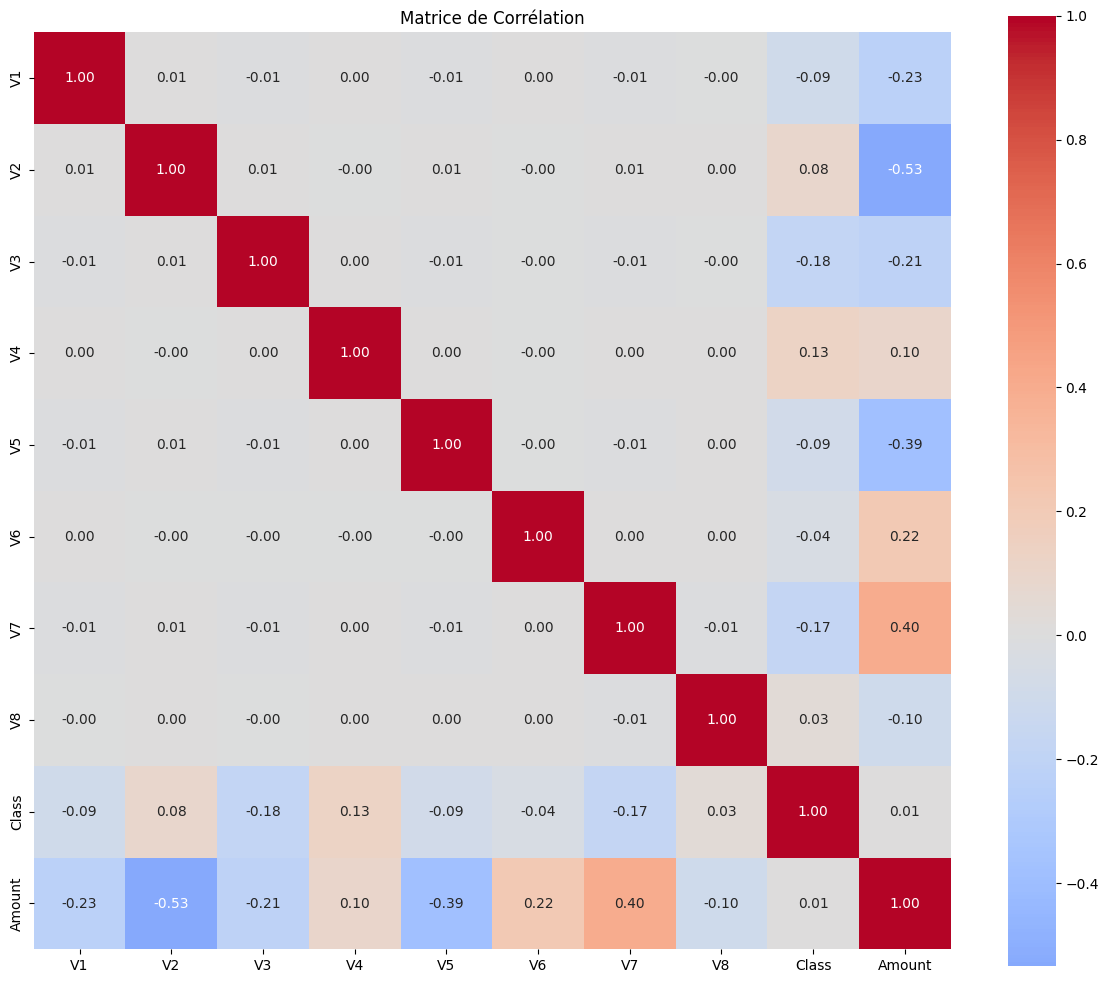

In [8]:
vars_corr = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'Class']
if 'Amount' in df.columns:
    vars_corr.append('Amount')

plt.figure(figsize=(12, 10))
corr_matrix = df[vars_corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Matrice de Corrélation')
plt.tight_layout()
plt.savefig('matrice_correlation.png', dpi=300, bbox_inches='tight')
plt.show()